In [1]:
# Imports
from routing import TaxiRouting, create_dataframes
import numpy as np
import pandas as pd
import random
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

### Taxi-Routing to Min-Cost Flow Formulation

Consider a taxi-routing problem over some time horizon. Over this time period, we know all the ride requests we will receive. Each ride request has a start/end location, start time, duration, and trip value. For example, trip value could be the revenue from that trip. We know the number of taxis and the layout of Manhattan. How can we create a min-cost flow formulation to solve this problem? 

In [2]:
# Define trips as a list of tuples (start, end, start_time, trip_time, value)
# EX: The first trip goes from location to 2 to 1 at time t=1. It takes 2 minutes to get there and the value is 2.

trips = [(0,1,0,2,1),
         (2,1,3,1,1),
         (2,3,2,1,1),
         (2,3,0,1,1)]

In [3]:
# Define a general transport arc as a list of tuples (start, end, trip_time)

arcs = []
arcs = [(1,2,1), (3,2,1)]

In [4]:
B = 2  # number of taxis
L = 4  # of locations
T = max(np.array(list(zip(*trips))[2]) + np.array(list(zip(*trips))[3]))  # time horizon

In [5]:
# Create an instance of this taxi-routing problem
trips_df, nodes_df, arcs_df = create_dataframes(trips, arcs, L)
small_ex = TaxiRouting(trips_df, nodes_df, arcs_df, 0, T, B)

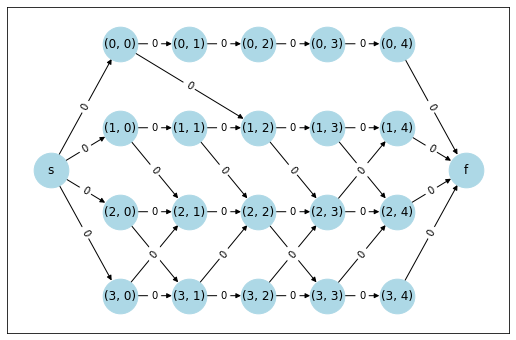

In [6]:
# View the min-cost flow graph (edge labels are flow on that edge)
small_ex.draw_graph()

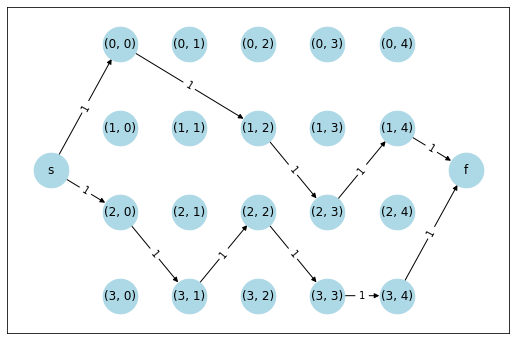

In [7]:
# Optimize
small_ex.optimize()
small_ex.draw_graph(draw_all=False)

### Taxi-Routing At Scale

In [8]:
# Load data
trips_df = pd.read_csv('data/2013-09-01_trip_data_manhattan.csv').drop(columns='id')
trips_df['revenue'] = 2.50 + 1.56*trips_df.trip_distance + 0.50*trips_df.trip_time
trips_df.revenue = trips_df.revenue.apply(lambda x: round(x,2))

nodes_df = pd.read_csv('data/nyc_nodes_manhattan.csv').drop(columns='Unnamed: 0')
arcs_df = pd.read_csv('data/nyc_links_manhattan.csv').drop(columns='Unnamed: 0')

In [9]:
trips_df.head(3)

,start_node,end_node,start_time,trip_time,passenger_count,trip_distance,revenue
0,333,692,0,6,5,2.204796,8.94
1,1802,110,0,7,1,1.738087,8.71
2,1769,77,0,9,1,5.262542,15.21


In [10]:
nodes_df.head(3)

,name,lon,lat,x,y
0,0,-74.003837,40.710545,-8.238069e+06,4.969740e+06
1,1,-73.969571,40.749594,-8.234255e+06,4.975477e+06
2,2,-73.964442,40.753157,-8.233684e+06,4.976000e+06


In [11]:
arcs_df.head(3)

,start,end,street_name,trip_time
0,598,597,MadisonAvenue,1
1,103,597,East60thStreet,1
2,599,598,MadisonAvenue,1


In [12]:
# Set a value to use for each trip
trips_df['value'] = trips_df['revenue']

In [13]:
# Create instance for 5:00 PM - 7:00 PM with 1500 taxis
nyc_taxi = TaxiRouting(trips_df, nodes_df, arcs_df, 1020, 1140, 1500)
print('This instance has',len(nyc_taxi.nodes),'nodes and',len(nyc_taxi.arcs),'arcs.')

This instance has 370625 nodes and 1139919 arcs.


In [14]:
nyc_taxi.optimize()
nyc_taxi.get_stats()

Summary Statistics
Avg. Moving Pct.:  0.9
Avg. On Trip Pct.:  0.68
Avg. Total Distance of Trips:  26.51
Avg. Revenue:  102.33
Total Trips:  12104 ( 0.89 )
Total Passengers:  22231 ( 0.89 )
Total Revenue:  153488.59 ( 0.91 )


In [15]:
random.seed(1101)  # set random seed
taxis = [random.randint(0,1500) for i in range(3)]
nyc_taxi.plot_taxi_route(taxis)

In [16]:
nyc_taxi.plot_taxi_route([taxis[2]])

In [17]:
trips_df['value'] = 1
nyc_taxi = TaxiRouting(trips_df, nodes_df, arcs_df, 1020, 1140, 1500)
print('This instance has',len(nyc_taxi.nodes),'nodes and',len(nyc_taxi.arcs),'arcs.')
nyc_taxi.optimize()
nyc_taxi.get_stats()

This instance has 370625 nodes and 1139919 arcs.
Summary Statistics
Avg. Moving Pct.:  0.89
Avg. On Trip Pct.:  0.64
Avg. Total Distance of Trips:  24.72
Avg. Revenue:  97.64
Total Trips:  12476 ( 0.92 )
Total Passengers:  22940 ( 0.92 )
Total Revenue:  146464.29 ( 0.87 )


In [18]:
random.seed(1101)  # set random seed
taxis = [random.randint(0,1500) for i in range(3)]
nyc_taxi.plot_taxi_route(taxis)